In [8]:
import pandas
messages = pandas.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011A6442BCF8>,
      dtype=object)

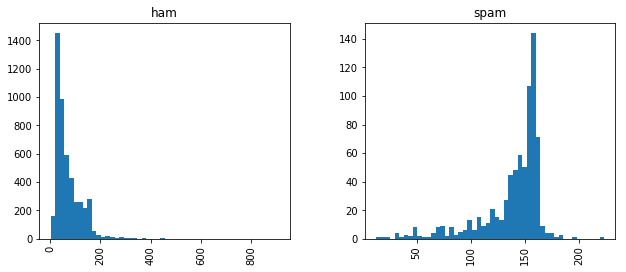

In [10]:
messages['length'] = messages['message'].apply(len)
messages.head()
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
messages.hist(column='length', by='label', bins=50,figsize=(10,4))


In [13]:
import string
from nltk.corpus import stopwords
def text_process(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
messages['message'].apply(text_process).head(5)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [16]:
# import os
# os.listdir('C:\\Users\\Arcgu\\AppData\\Roaming\\nltk_data\\corpora\\stopwords')

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'README',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

print("Total no. of words",len(bow_transformer.vocabulary_))

Total no. of words 11425


In [19]:
messages_bow = bow_transformer.transform(messages['message'])
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


In [21]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
messages_tfidf.shape

(5572, 11425)

In [30]:
messages_tfidf.data[0]

0.23026685592418913

In [33]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])
all_predictions = spam_detect_model.predict(messages_tfidf)
from sklearn.metrics import classification_report
print(classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [34]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size=0.2)

print( len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [35]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()),  
    ('classifier', MultinomialNB()),  
])
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)


'              precision    recall  f1-score   support\n\n         ham       1.00      0.96      0.98       999\n        spam       0.72      1.00      0.84       116\n\n    accuracy                           0.96      1115\n   macro avg       0.86      0.98      0.91      1115\nweighted avg       0.97      0.96      0.96      1115\n'

In [36]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98       999
        spam       0.72      1.00      0.84       116

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115

